In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Data set
np.random.seed(123)
d = 2 
n = 10 
N = d*n 
mean0 = 0 
mean1 = 5

In [92]:
# input data
X0 = np.random.randn(n, d) + np.array([mean0, mean0])
X1 = np.random.randn(n, d) + np.array([mean1, mean1])
X = np.concatenate((X0, X1), axis=0)

In [93]:
# teacher data
Y0 = np.array([0 for i in range(n)])
Y1 = np.array([1 for i in range(n)])
Y = np.concatenate((Y0, Y1), axis=0)

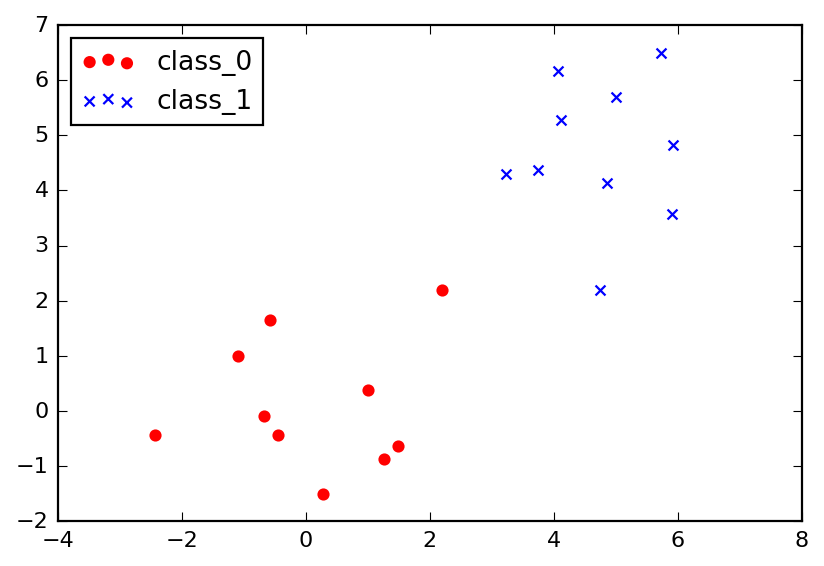

In [5]:
plt.scatter(X[:n, 0], X[:n, 1], color='red', marker='o', label='class_0')
plt.scatter(X[n:N, 0], X[n:N, 1], color='blue', marker='x', label='class_1')
plt.legend(loc='upper left')
plt.show()

In [88]:
# Perceptron

class Perceptron:
    def __init__(self, input_dim, eta=1.0):
        self.w = np.zeros(input_dim)
        self.b = 0
        self.eta = eta
    
    def step(self, x):
        return 1*(x > 0)
    
    def y(self, w, x):
        return self.step(np.dot(w, x) + self.b)
    
    def fit(self, X, Y):
        while True:
            classified = True
            for i in range(20):
                update = self.eta*(Y[i] - self.y(self.w, X[i]))
                delta_w = update * X[i]
                delta_b = update
                self.w += delta_w
                self.b += delta_b
                classified *= all(delta_w == 0)*(delta_b == 0)
            if classified:
                break
        return 

pt = Perceptron(input_dim = 2)
pt.fit(X,Y)
print('w = ', pt.w)
print('b = ', pt.b)

w [ 2.14037745  1.2763927 ]
b -9.0
w =  [ 2.14037745  1.2763927 ]
b =  -9.0


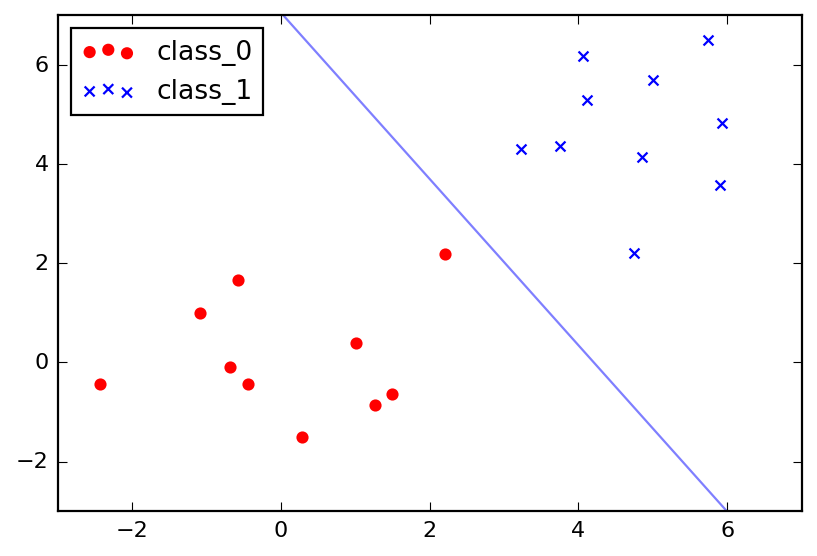

In [91]:
# section plot
x1 = np.array(range(-10,10,1))
x2 = (w[0]*x1 + pt.b)/-pt.w[1]
plt.plot(x1, x2, alpha=0.5)

plt.scatter(X[:n, 0], X[:n, 1], color='red', marker='o', label='class_0')
plt.scatter(X[n:N, 0], X[n:N, 1], color='blue', marker='x', label='class_1')
plt.xlim(-3, 7)
plt.ylim(-3, 7)
plt.legend(loc='upper left')
plt.show()